# Linear Regression Tutorial 

## What is Linear Regression??

Linear Regression is a mathematical technique in which the input features(independent variables ) are mapped to the given 
outputs(dependent variable) using a linear mathematical function.This linear function is then used for predicting the outputs for given input features.Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x).

We would divide our regression task into following discrete steps:
<ol>
    <li>Data
    <li>Model
    <li>Loss
    <li>learning
    <li>Evaluation


## <li>Loading Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn import linear_model,metrics

### Example

We use features $\mathbf{x}$ to predict a "response" $y$. For example we might want to map house_features onto house_price in other words we predict house_price from features of house.

Let's generate some sklearn data for this case and examine the relationship between $\mathbf{x}$(house_feature) and $y$(house_price).

X= [[-1.34677961]
 [-0.15768217]
 [ 1.95405889]] 
 y= [-219.20568626 -212.70382268 -206.2019591 ]


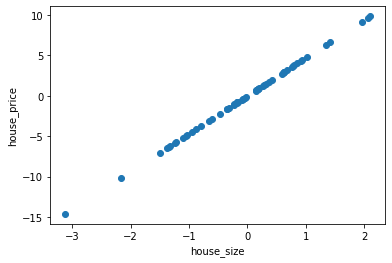

In [18]:
#Loading and visualizing the data 
X , Y = make_regression(n_samples=60,n_features=1,bias=0.0,n_targets=1)
print('X=',X[0:3],'\n','y=',y[0:3])
plt.scatter(X, Y)
plt.xlabel('house_size')
plt.ylabel('house_price')
plt.show()

On Analyzing above scatter plot  we suspect that a linear line is the best fit for the data points.
We will now build a linear model to fit this data

## <li>Linear Model
To describe the supervised learning problem slightly more formally, our goal is, given a training set, to learn a function h : X → Y so that h(x) is a “good” predictor for the corresponding value of y. This function h is called a hypothesis. Seen pictorially, the process is therefore like this:
  
<img src = "https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/H6qTdZmYEeaagxL7xdFKxA_2f0f671110e8f7446bb2b5b2f75a8874_Screenshot-2016-10-23-20.14.58.png?expiry=1602892800000&hmac=jrYdSIhbIq99eNTy71m1cMRII3sZ8-MB3ArBkNUh8Bo">

#### Hypothesis:
Hypothesis is the linear function that is used to fit the data points.We express this hypothesis in the univariate case as

 <img src = "https://media.geeksforgeeks.org/wp-content/uploads/linear-regression-hypothesis.jpg">

Our simple example above was an example of "univariate regression" - i.e. just one variable (or "feature") - size of house.

Here $\theta_{2}$ is a vector of parameters to be learned, $\theta_{1}$ is a bias term and $\mathbf{X}$ is the "design matrix" with all the data points. In this formulation the intercept(bias) term is to be added to the design matrix as the first column (of all ones).

#### Design Matrix:

In general with $n$ data points and $p$ features our design matrix will have $n$ rows and $p$ columns.

Returning to our housing prediction  regression example, let's add one more feature - number of hours slept the night before the exam. If we have 60 data points and 1 features, then our matrix will be of shape $60 \times 2$ (remember we add a bias column). The first three rows  might look like

$$
\begin{bmatrix}
    1 & -0.85857665  \\
    1 & -1.98210646  \\
    1 &    0.18146281  \\
\end{bmatrix}
$$
We do not include the y values in the design matrix

## <li>Cost function
We can measure the accuracy of our hypothesis function by using a <b>cost function</b>.Cost function takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.The mean is halved  as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the fraction term. 

$$J(\theta{}) = \frac{1}{2}\sum(h(\theta)-y)^2$$

If we try to think of it in visual terms, our training data set is scattered on the x-y plane. We are trying to make a straight line (defined by hypothesis y) which passes through these scattered data points.
Our objective is to get the best possible line. The best possible line will be such so that the average squared vertical distances of the scattered points from the line will be the least. Ideally, the line should pass through all the points of our training data set. In such a case, the value of cost function would be 0.The following image summarizes what the cost function does

<img src = "https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/R2YF5Lj3EeajLxLfjQiSjg_110c901f58043f995a35b31431935290_Screen-Shot-2016-12-02-at-5.23.31-PM.png?expiry=1602892800000&hmac=yNTjY-fg0T8YgEZxlkHTXV5xjGEk7aZ3YAP-RrH-i18">

## Learning
Once our model is ready, it has to learn the best parameters to get best linear line to fit the data.That is, for our example bias unit $\theta_1$ and coeffecient $\theta_2$ have to be adjusted such that the above squared errror is minimized.We use a optimization algorithm for this purpose which iteratively updates parameters by analyzing the performance of model(using loss) with respect to current parameters.In machine learning gradient descent algorithm is used to minimize the loss function
#### Gradient Descent algorithm: 
Our loss function happens to be a convex function. So the "loss surface" (i.e. the map of the loss values over all the parameter values) has a nice convex shape like so:
<img src="http://theinf2.informatik.uni-jena.de/theinf2_multimedia/bilder/lectures/convex-width-244-height-261.jpg">

So gradient descent algorithm updates parameters by  by iteratively moving in the direction of steepest descent as defined by the negative of the gradient.

##### Gradient descent ituition:

Consider the 3-dimensional graph below in the context of a cost function. Our goal is to move from the mountain in the top right corner (high cost) to the dark blue sea in the bottom left (low cost). The arrows represent the direction of steepest descent (negative gradient) from any given point–the direction that decreases the cost function as quickly as possible.

<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent.png">

Starting at the top of the mountain, we take our first step downhill in the direction specified by the negative gradient. Next we recalculate the negative gradient (passing in the coordinates of our new point) and take another step in the direction it specifies. We continue this process iteratively until we get to the bottom of our graph, or to a point where we can no longer move downhill–a local minimum

<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png">

For our example the gradient descent can be represented mathematically as follows:

$\theta_{1} = \theta_{1} - \alpha\frac{dJ}{d\theta_{1}}$

$\theta_{2} = \theta_{2} - \alpha\frac{dJ}{d\theta_{2}}$

Here,
<li>$\alpha$ is a learning rate

<li>$\frac{dJ}{d\theta_{1}}$ is the derivative of loss function w.r.t bias unit

<li>$\frac{dJ}{d\theta_{2}}$ is the derivative of loss function w.r.t coefficient parameter


## Fit Model
Fitting the model really is the easy part, as far as coding is concerned. Data preparation is usually the most time consuming.

You need to create a new instance of sklearn.linear_model.LinearRegression and use the fit() function to fit it to X using y. The documentation is here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [8]:
house_model = linear_model.LinearRegression(normalize=True)
house_model.fit(X,y)
a = house_model.coef_
b = house_model.intercept_
print(house_model.coef_)
print(house_model.intercept_)

[54.80142156]
-1.0658141036401503e-14


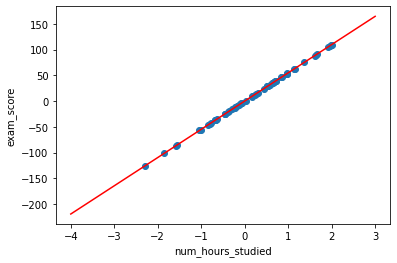

In [9]:
# Visualize the results
plt.scatter(X,y)
x = np.linspace(-4, 3,60)
y = a*x + b
plt.plot(x, y,'r')
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.show()

So as observed in the above plot the line with coeffecient 17.48 and bias unit 1.7763568394002505e-15 is the best fit for the data distribution above 
The line fits pretty well using the eye, as it should, because the true function is linear and the data has just a little noise.

But we need a mathematical way to define a good fit in order to find the optimal parameters for our hypothesis.

## <li>Evaluation(Assessing The goodness of fit)
Let's now assess the performance of this fit using mean squared error. sklearn makes this easy to calculate, providing the sklearn.metric.mean_squared_error function - reference here http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    

In [24]:
train_pred = house_model.predict(X)
mse_train = metrics.mean_squared_error(y, train_pred)
print(mse_train)

15422.002444832808


The on the basis of above metrics we can evaluate how good our model has done on the given dataset

### Bias-Variance Tradeoff
In statistical learning we have two important measures to trade-off: bias and variance.

Suppose the real function we are trying to model (not directly available to us) is $f$. Our hypothesis gives us an estimate of this function, $\hat{f} = h_\theta$. How far $f$ is from $\hat{f}$ is called bias.

But since we don't have access to $f$ we use some data to make our estimate. But not all datasets will give us a clean view of $f$. There will be noise and incompleteness. This will introduce variance into our estimate: the amount to which we miss $f$ due to fitting noise in our dataset.

The following picture shows various bias-variance regimes, assuming our function is aiming for a bulls-eye:
<li>top-left: high bias, low variance
<li>top-right: high bias, high variance
<li>bottom-left: low bias, low variance
<li>bottom-right: low bias, high variance</li>
<img src="https://miro.medium.com/max/1000/1*feFntGUIiob7MwUX62jdCg.png">